In [2]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv("C:/Users/Selma/Desktop/Ironhack/labs/MID PROJECT/travel_dataset_cleaned.csv")
df

,Unnamed: 0,Destination,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,Age range,Destination Region,Traveler Region,Trip month,Total cost,Budget
0,0,UK,7.0,35.0,Male,US American,Hotel,1200,Airplane,600,32 - 37,Europe,North America,5,1800,medium high
1,1,Thailand,5.0,28.0,Female,Canadian,Luxury stay,800,Airplane,500,20 - 28,Africa,North America,6,1300,medium low
2,2,Indonesia,7.0,45.0,Male,Korean,Luxury stay,1000,Airplane,700,38 +,Asia,Asia,7,1700,medium high
3,3,USA,14.0,29.0,Female,UK,Hotel,2000,Airplane,1000,29 - 31,North America,Europe,8,3000,high
4,4,Japan,7.0,26.0,Female,Vietnamese,Airbnb,700,Train,200,20 - 28,Asia,Asia,9,900,medium low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,134,Brazil,9.0,37.0,Male,Brazilian,Hostel,2500,Car,2000,32 - 37,South America,South America,8,4500,high
132,135,Canada,6.0,29.0,Female,Canadian,Hotel,5000,Airplane,3000,29 - 31,North America,North America,8,8000,high
133,136,Thailand,7.0,34.0,Male,Chinese,Hostel,2000,Train,1000,32 - 37,Africa,Asia,9,3000,high
134,137,Spain,7.0,25.0,Female,Spanish,Airbnb,6000,Airplane,2500,20 - 28,Europe,Europe,9,8500,high


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
df.columns

Index(['Destination', 'Duration (days)', 'Traveler age', 'Traveler gender',
       'Traveler nationality', 'Accommodation type', 'Accommodation cost',
       'Transportation type', 'Transportation cost', 'Age range',
       'Destination Region', 'Traveler Region', 'Trip month', 'Total cost',
       'Budget'],
      dtype='object')

In [6]:
X = df.drop(['Destination', 'Duration (days)', 'Traveler age','Traveler nationality', 'Accommodation type','Transportation type', 'Traveler Region', 'Trip month', 'Total cost'], axis=1)
X

,Traveler gender,Accommodation cost,Transportation cost,Age range,Destination Region,Budget
0,Male,1200,600,32 - 37,Europe,medium high
1,Female,800,500,20 - 28,Africa,medium low
2,Male,1000,700,38 +,Asia,medium high
3,Female,2000,1000,29 - 31,North America,high
4,Female,700,200,20 - 28,Asia,medium low
...,...,...,...,...,...,...
131,Male,2500,2000,32 - 37,South America,high
132,Female,5000,3000,29 - 31,North America,high
133,Male,2000,1000,32 - 37,Africa,high
134,Female,6000,2500,20 - 28,Europe,high


In [7]:
y = df.drop(['Destination', 'Duration (days)', 'Traveler age', 'Traveler gender',
       'Traveler nationality', 'Accommodation type', 'Accommodation cost',
       'Transportation type', 'Transportation cost', 'Age range',
       'Destination Region', 'Traveler Region', 'Trip month','Budget'], axis=1)

y

,Total cost
0,1800
1,1300
2,1700
3,3000
4,900
...,...
131,4500
132,8000
133,3000
134,8500


In [8]:
X = pd.get_dummies(X, drop_first=True)
X

,Accommodation cost,Transportation cost,Traveler gender_Male,Age range_29 - 31,Age range_32 - 37,Age range_38 +,Destination Region_Asia,Destination Region_Europe,Destination Region_Middle east,Destination Region_North America,Destination Region_South America,Budget_low,Budget_medium high,Budget_medium low
0,1200,600,True,False,True,False,False,True,False,False,False,False,True,False
1,800,500,False,False,False,False,False,False,False,False,False,False,False,True
2,1000,700,True,False,False,True,True,False,False,False,False,False,True,False
3,2000,1000,False,True,False,False,False,False,False,True,False,False,False,False
4,700,200,False,False,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2500,2000,True,False,True,False,False,False,False,False,True,False,False,False
132,5000,3000,False,True,False,False,False,False,False,True,False,False,False,False
133,2000,1000,True,False,True,False,False,False,False,False,False,False,False,False
134,6000,2500,False,False,False,False,False,True,False,False,False,False,False,False


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0) 

In [10]:
display(X_train)
X_test

,Accommodation cost,Transportation cost,Traveler gender_Male,Age range_29 - 31,Age range_32 - 37,Age range_38 +,Destination Region_Asia,Destination Region_Europe,Destination Region_Middle east,Destination Region_North America,Destination Region_South America,Budget_low,Budget_medium high,Budget_medium low
108,900,150,False,False,False,True,False,True,False,False,False,False,False,True
10,1000,500,False,False,False,False,False,False,False,False,True,False,True,False
2,1000,700,True,False,False,True,True,False,False,False,False,False,True,False
51,900,200,False,False,False,False,True,False,False,False,False,False,False,True
100,900,400,True,False,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,2500,800,True,False,False,True,False,False,True,False,False,False,False,False
103,1000,800,True,False,True,False,False,True,False,False,False,False,True,False
67,1000,800,True,False,False,False,False,False,False,True,False,False,True,False
117,900,400,True,False,False,True,False,True,False,False,False,False,False,True


,Accommodation cost,Transportation cost,Traveler gender_Male,Age range_29 - 31,Age range_32 - 37,Age range_38 +,Destination Region_Asia,Destination Region_Europe,Destination Region_Middle east,Destination Region_North America,Destination Region_South America,Budget_low,Budget_medium high,Budget_medium low
26,1100,150,False,True,False,False,False,True,False,False,False,False,False,True
8,1200,200,False,True,False,False,False,True,False,False,False,False,False,True
54,400,50,False,False,False,False,False,False,False,False,False,True,False,False
113,200,500,True,False,True,False,True,False,False,False,False,True,False,False
43,900,100,True,False,False,True,False,True,False,False,False,False,False,True
84,900,600,True,False,False,True,True,False,False,False,False,False,True,False
22,700,80,False,True,False,False,False,True,False,False,False,True,False,False
50,500,100,True,False,False,False,True,False,False,False,False,True,False,False
45,1500,500,True,False,False,True,False,False,False,True,False,False,True,False
24,1400,100,False,False,False,False,False,True,False,False,False,False,True,False


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
# fit transform the data with the scaler

X_train = scaler.fit_transform(X_train)

# x_train = (X_train - mean(X_train))/std(X_train) also storing the mean(x_train), std(x_train), for each feature

X_test = scaler.transform(X_test) #ici on utilise les values storés juste au dessus pour les appliquer au x_test

# x_test = (X_test -mean(X_train))/(std(X_train)) on utilise les statistiques du train test 

In [13]:
X_train #the numbers look scaled 

array([[0.0955414 , 0.04362416, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.10828025, 0.16107383, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.10828025, 0.22818792, 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.10828025, 0.26174497, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.0955414 , 0.12751678, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.03184713, 0.04362416, 1.        , ..., 1.        , 0.        ,
        0.        ]])

In [14]:
## now we can create a model the Linear Regression with sklearn

from sklearn.linear_model import LinearRegression

regressor = LinearRegression() #this is the model 

regressor.fit(X_train, y_train) #now we fit the model to the data and let the model to learn 
#the model is gonna try to learn from the train set to try to predict the variable also on the train set 

LinearRegression()

In [15]:
# how to get the coefficients of the model: b1,b2,b3,b4,b5 (all the columns adm, marketing, etc)

regressor.coef_

#which make sense because B1 (R&D) is the strongest variable (with more strenght) and therfore has the biggest coefficient 

array([[ 7.85000000e+03,  2.98000000e+03,  3.13008187e-12,
         1.78892018e-12, -5.43567818e-13,  1.14323534e-12,
        -5.90521971e-13, -8.94169377e-13,  5.38671552e-13,
        -3.06915637e-12, -1.32106509e-12, -1.80780486e-13,
         1.94426198e-12, -8.04388749e-13]])

In [16]:
regressor.intercept_  #b0 or the bias 

array([170.])

In [17]:
# performances on the train set to see if the model learned something 
print("train set score", regressor.score(X_train, y_train)) #this methods is the same as R2 score (same result)
print("test set score", regressor.score(X_test, y_test))


train set score 1.0
test set score 1.0


In [18]:
#predictions :

predictions_trainset = regressor.predict(X_train)
predictions_testset = regressor.predict(X_test)


In [19]:
# 3 methods from sklearn library : MAE, MSE, R2
# 1. mean absolute error (tells what is the average of the errors between the prediction and the real data point )
# 2. mean squared error (tells not the average of the errors but the avergae of the squares (a bit like the variance))

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_train,predictions_trainset)
mae = mean_absolute_error(y_train,predictions_trainset)
r2 = r2_score(y_train,predictions_trainset)
print(rmse, mae, r2)

5.1252706725928316e-24 1.8332002582610585e-12 1.0


In [20]:
rmse = mean_squared_error(y_test,predictions_testset)
mae = mean_absolute_error(y_test,predictions_testset)
r2 = r2_score(y_test,predictions_testset)
print(rmse, mae, r2)

4.556878910225161e-24 1.737784519458988e-12 1.0


In [21]:
regressor.coef_

array([[ 7.85000000e+03,  2.98000000e+03,  3.13008187e-12,
         1.78892018e-12, -5.43567818e-13,  1.14323534e-12,
        -5.90521971e-13, -8.94169377e-13,  5.38671552e-13,
        -3.06915637e-12, -1.32106509e-12, -1.80780486e-13,
         1.94426198e-12, -8.04388749e-13]])

In [22]:
X_test.shape

(28, 14)

In [23]:
y # target feature 
predictions_train = regressor.predict(X_train)# => prediction on the train set 
residuals_train = y_train - predictions_train # Residuals of the models (errors)
#(y_train = the real value on the train set  ; predictions_train = the prediction on the train set  )

C:\Users\Selma\AppData\Local\Temp\ipykernel_12424\2449479644.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals_train)
c:\Users\Selma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


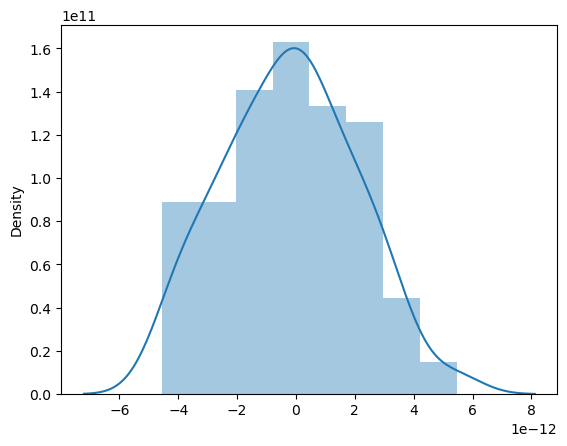

In [24]:
sns.distplot(residuals_train)
plt.show()
#this are the residual of the profit on the train set 
#one assumption of the model is that the residuals are Gaussian, is normally distributed 

C:\Users\Selma\AppData\Local\Temp\ipykernel_12424\2973724247.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals_test)
c:\Users\Selma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


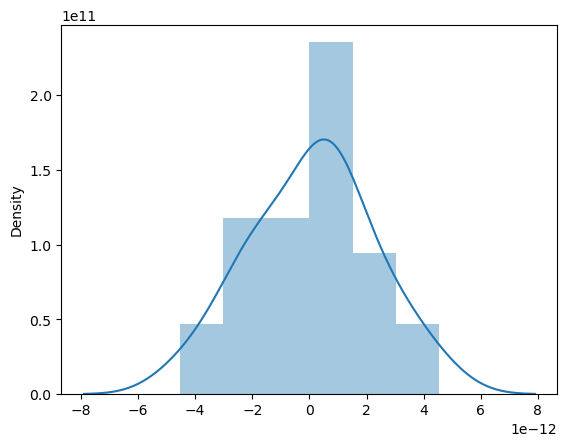

In [25]:
y
predictions_test = regressor.predict(X_test)
residuals_test = y_test - predictions_test
sns.distplot(residuals_test)
plt.show()

In [26]:
#plot = sns.scatterplot((y_train, residuals_train))
#plot.set(xlabel = "Target", ylabel = "Residuals")
#plt.show()

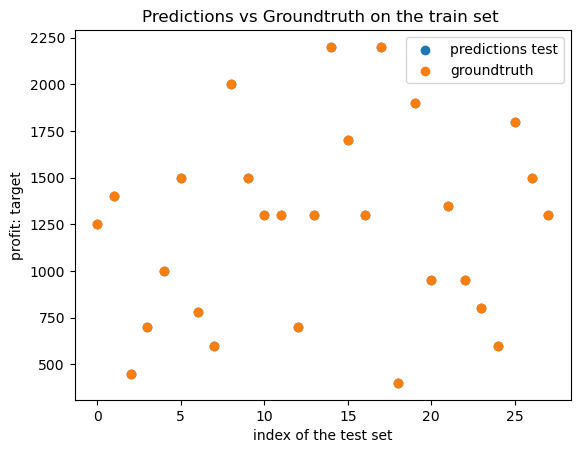

In [27]:
t = np.arange(0,28)

fig, ax = plt.subplots()

plt.scatter(t, predictions_test)
plt.scatter(t, y_test)

#add title 
plt.title("Predictions vs Groundtruth on the train set ")

# add labels to the axis 
plt.xlabel("index of the test set")
plt.ylabel("profit: target")

#legend 
plt.legend(["predictions test", "groundtruth"], loc ="upper right")


plt.show()

In [28]:
X.columns

Index(['Accommodation cost', 'Transportation cost', 'Traveler gender_Male',
       'Age range_29 - 31', 'Age range_32 - 37', 'Age range_38 +',
       'Destination Region_Asia', 'Destination Region_Europe',
       'Destination Region_Middle east', 'Destination Region_North America',
       'Destination Region_South America', 'Budget_low', 'Budget_medium high',
       'Budget_medium low'],
      dtype='object')

In [29]:
regressor.coef_

array([[ 7.85000000e+03,  2.98000000e+03,  3.13008187e-12,
         1.78892018e-12, -5.43567818e-13,  1.14323534e-12,
        -5.90521971e-13, -8.94169377e-13,  5.38671552e-13,
        -3.06915637e-12, -1.32106509e-12, -1.80780486e-13,
         1.94426198e-12, -8.04388749e-13]])

In [30]:
## rank of the features

feature_importance = pd.DataFrame({"features": X.columns,
                                  "weights": regressor.coef_}) 

feature_importance.sort_values(by = "weights", ascending =False)


ValueError: Per-column arrays must each be 1-dimensional